In [281]:
import random
import copy

class Individuo:
    def __init__(self, tam):
        self.ind = []
        self.tam = tam
        for i in range(0, tam):
            self.ind.append(0)
        valor = int(random.random() * tam)
        self.ind[valor] = 1
        self.avaliacao = 0

    def avaliar(self):
        peso = 0
        preco = 0
        for i in range(0, self.tam):
            if self.ind[i] == 1:       
                peso += pesos[i]
                preco += precos[i]
        if peso < capacidade:
            self.avaliacao = preco
        else:
            self.avaliacao = 0
        return self.avaliacao
    
    def mostrar(self):
        print(self.ind)

    def getAvaliacao(self):
        return self.avaliacao
    

    def getIndividuo(self):
        return self.ind
    
    def setIndividuo(self, ind):
        self.ind = ind

                

In [282]:
def metodoRoleta(avaliacao):
        posicao = int(random.random() * avaliacao)
        count = 0
        for i in range(tamPopulacao):
                count += populacao[i].getAvaliacao()
                if posicao <= count:
                        return i

In [283]:
def crossoverUmPonto(pai1, pai2):
    corte = int(random.random() * 10)  # Garante corte entre 0 e 9
    cromossomo1 = populacao[pai1].getIndividuo()
    cromossomo2 = populacao[pai2].getIndividuo()

    filho = cromossomo1[:corte] + cromossomo2[corte:]  # Correção aqui
    return filho

In [284]:
def melhorIndividuo(populacao):
    melhor = 0
    for i in populacao:
        valor = int(i.avaliar())
        if valor > melhor:
            melhor = valor

    return melhor

In [285]:
def mutacaoUniforme(filho):
    for p in range(len(filho)):  # Usa o tamanho real do filho
        if random.random() < taxa:
            filho[p] = (filho[p] + 1) % 2
    return filho

In [286]:
tamPopulacao = 100
geracoes = 150
capacidade = 20
taxa = 0.1

pesos = [7, 3, 4, 1, 8, 10, 9, 2, 6, 4]
precos = [5, 15, 22, 37, 14, 2, 1, 100, 22, 2]
populacao = []
novaPopulacao = []
pai1 = 0
pai2 = 0

In [287]:
for i in range(tamPopulacao):
    individuo = Individuo(10)
    populacao.append(individuo)
    populacao[i].mostrar()

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0

In [288]:
cont = 0
while cont < geracoes:
    avaliacaoTotal = 0
    for i in range(tamPopulacao):
        individuo = populacao[i]
        avaliacaoTotal += individuo.avaliar()

    novaPopulacao = []
    for i in range(tamPopulacao):
        pai1 = metodoRoleta(avaliacaoTotal)
        pai2 = metodoRoleta(avaliacaoTotal)

        filho = crossoverUmPonto(pai1, pai2)
        filho = mutacaoUniforme(filho)
        indFilho = Individuo(10)  # aqui era maiusculo e n minusculo
        indFilho.setIndividuo(filho)
        novaPopulacao.append(indFilho)


    populacao = copy.deepcopy(novaPopulacao)
    print('it:{} valor:{}'.format(cont, melhorIndividuo(populacao)))
    cont += 1

    print(f'O melhor individuo é {melhorIndividuo(populacao)}')

it:0 valor:174
O melhor individuo é 174
it:1 valor:179
O melhor individuo é 179
it:2 valor:181
O melhor individuo é 181
it:3 valor:196
O melhor individuo é 196
it:4 valor:183
O melhor individuo é 183
it:5 valor:183
O melhor individuo é 183
it:6 valor:188
O melhor individuo é 188
it:7 valor:188
O melhor individuo é 188
it:8 valor:196
O melhor individuo é 196
it:9 valor:188
O melhor individuo é 188
it:10 valor:188
O melhor individuo é 188
it:11 valor:196
O melhor individuo é 196
it:12 valor:196
O melhor individuo é 196
it:13 valor:196
O melhor individuo é 196
it:14 valor:196
O melhor individuo é 196
it:15 valor:196
O melhor individuo é 196
it:16 valor:196
O melhor individuo é 196
it:17 valor:196
O melhor individuo é 196
it:18 valor:196
O melhor individuo é 196
it:19 valor:196
O melhor individuo é 196
it:20 valor:196
O melhor individuo é 196
it:21 valor:188
O melhor individuo é 188
it:22 valor:196
O melhor individuo é 196
it:23 valor:196
O melhor individuo é 196
it:24 valor:196
O melhor i

In [292]:
melhores_valores = []  # Lista para armazenar os melhores valores

cont = 0
while cont < geracoes:
    avaliacaoTotal = 0
    for i in range(tamPopulacao):
        individuo = populacao[i]
        avaliacaoTotal += individuo.avaliar()

    novaPopulacao = []
    for i in range(tamPopulacao):
        pai1 = metodoRoleta(avaliacaoTotal)
        pai2 = metodoRoleta(avaliacaoTotal)

        filho = crossoverUmPonto(pai1, pai2)
        filho = mutacaoUniforme(filho)
        indFilho = Individuo(10)
        indFilho.setIndividuo(filho)
        novaPopulacao.append(indFilho)

    populacao = copy.deepcopy(novaPopulacao)
    melhores_valores.append(melhorIndividuo(populacao))  # Armazena o melhor valor
    print('it:{} valor:{}'.format(cont, melhores_valores[-1]))
    cont += 1


it:0 valor:196
it:1 valor:196
it:2 valor:196
it:3 valor:196
it:4 valor:196
it:5 valor:188
it:6 valor:183
it:7 valor:196
it:8 valor:196
it:9 valor:196
it:10 valor:183
it:11 valor:196
it:12 valor:196
it:13 valor:196
it:14 valor:183
it:15 valor:181
it:16 valor:188
it:17 valor:196
it:18 valor:188
it:19 valor:196
it:20 valor:188
it:21 valor:188
it:22 valor:188
it:23 valor:196
it:24 valor:183
it:25 valor:183
it:26 valor:196
it:27 valor:196
it:28 valor:196
it:29 valor:196
it:30 valor:196
it:31 valor:196
it:32 valor:196
it:33 valor:188
it:34 valor:196
it:35 valor:196
it:36 valor:188
it:37 valor:176
it:38 valor:179
it:39 valor:188
it:40 valor:188
it:41 valor:196
it:42 valor:196
it:43 valor:188
it:44 valor:188
it:45 valor:176
it:46 valor:183
it:47 valor:183
it:48 valor:196
it:49 valor:196
it:50 valor:196
it:51 valor:183
it:52 valor:196
it:53 valor:196
it:54 valor:188
it:55 valor:188
it:56 valor:183
it:57 valor:183
it:58 valor:196
it:59 valor:196
it:60 valor:196
it:61 valor:196
it:62 valor:196
it

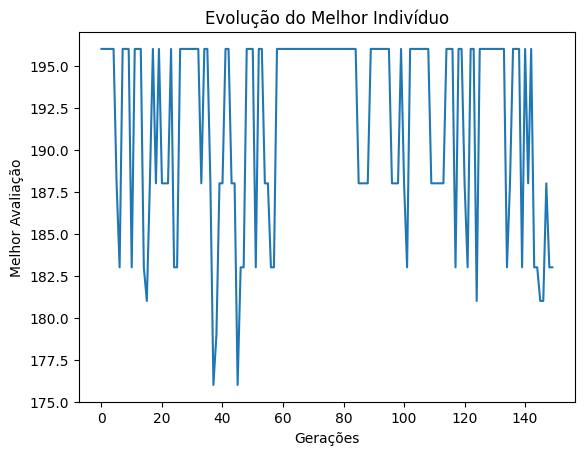

In [297]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, geracoes, 1)  
y = melhores_valores 

plt.plot(x, y)
plt.xlabel("Gerações")
plt.ylabel("Melhor Avaliação")
plt.title("Evolução do Melhor Indivíduo")
plt.show()